In [132]:
# INSTALLATION DES BIBLIOTHEQUES A UTILISEES DANS CE PROJET
import pickle

import joblib

# AJOUTE DES VISUALISATIONS SIMPLES AVEC LES BIBLIOTHEQUE MATPLOTLIB ET SEABORN POUR REPERER LES TENDONCES
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import Binarizer

# EVALUATION DU MODEL MAE MSE R2
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    mean_absolute_error,
    mean_squared_error,
    r2_score,
)

# RANDOM FOREST
# IMPORTATION LA BIBLIOTHEQUE NECESSAIRE POUR L'ENTRAINEMENT DU MODELE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler

# XGBREGRESSOR
# IMPORTATION LA BIBLIOTHEQUE NECESSAIRE POUR L'ENTRAINEMENT DU MODELE
from xgboost import XGBRegressor


In [2]:
#IMPORTATION DU DATASET TELECHARGER SUR LE SITE DE KAGGLE
file_path = "app/powerconsumption.csv"
data = pd.read_csv(file_path)

In [3]:
#AFFICHAGE DES DONNEES DE DATASET 
print(data.head())

        Datetime  Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  \
0  1/1/2017 0:00        6.559      73.8      0.083                0.051   
1  1/1/2017 0:10        6.414      74.5      0.083                0.070   
2  1/1/2017 0:20        6.313      74.5      0.080                0.062   
3  1/1/2017 0:30        6.121      75.0      0.083                0.091   
4  1/1/2017 0:40        5.921      75.7      0.081                0.048   

   DiffuseFlows  PowerConsumption_Zone1  PowerConsumption_Zone2  \
0         0.119             34055.69620             16128.87538   
1         0.085             29814.68354             19375.07599   
2         0.100             29128.10127             19006.68693   
3         0.096             28228.86076             18361.09422   
4         0.085             27335.69620             17872.34043   

   PowerConsumption_Zone3  
0             20240.96386  
1             20131.08434  
2             19668.43373  
3             18899.27711  
4     

In [4]:
# SUPRESSION DES COLONNES QU'ON AURRA PAS BESOIN
data = data.drop('Datetime', axis=1)
data = data.drop('WindSpeed', axis=1)
data = data.drop('GeneralDiffuseFlows', axis=1)
data = data.drop('DiffuseFlows', axis=1)

In [5]:
# APERCU LA STRUCTRURE APRES LA SUPRESSION NOMBRE DE LIGNE ET COLONNES
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature             52416 non-null  float64
 1   Humidity                52416 non-null  float64
 2   PowerConsumption_Zone1  52416 non-null  float64
 3   PowerConsumption_Zone2  52416 non-null  float64
 4   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(5)
memory usage: 2.0 MB
None


In [6]:
# RESUME STATISTIQUE DES COLONNES NUMERIQUE
print(data.describe())

        Temperature      Humidity  PowerConsumption_Zone1  \
count  52416.000000  52416.000000            52416.000000   
mean      18.810024     68.259518            32344.970564   
std        5.815476     15.551177             7130.562564   
min        3.247000     11.340000            13895.696200   
25%       14.410000     58.310000            26310.668692   
50%       18.780000     69.860000            32265.920340   
75%       22.890000     81.400000            37309.018185   
max       40.010000     94.800000            52204.395120   

       PowerConsumption_Zone2  PowerConsumption_Zone3  
count            52416.000000            52416.000000  
mean             21042.509082            17835.406218  
std               5201.465892             6622.165099  
min               8560.081466             5935.174070  
25%              16980.766032            13129.326630  
50%              20823.168405            16415.117470  
75%              24713.717520            21624.100420  
ma

In [7]:
# VERIFICATION DES VALEURS MANQUANTES
print(data.isnull().sum())

Temperature               0
Humidity                  0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
dtype: int64


In [8]:
# NORMALISATION DES FACTEURS X AVEC LA CIBLE Y 
X = data[['Temperature', 'Humidity']]
y = data[['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']]

In [9]:
print("X")
print(X)
print("y")
print(y)

X
       Temperature  Humidity
0            6.559      73.8
1            6.414      74.5
2            6.313      74.5
3            6.121      75.0
4            5.921      75.7
...            ...       ...
52411        7.010      72.4
52412        6.947      72.6
52413        6.900      72.8
52414        6.758      73.0
52415        6.580      74.1

[52416 rows x 2 columns]
y
       PowerConsumption_Zone1  PowerConsumption_Zone2  PowerConsumption_Zone3
0                 34055.69620             16128.87538             20240.96386
1                 29814.68354             19375.07599             20131.08434
2                 29128.10127             19006.68693             19668.43373
3                 28228.86076             18361.09422             18899.27711
4                 27335.69620             17872.34043             18442.40964
...                       ...                     ...                     ...
52411             31160.45627             26857.31820             14780.3121

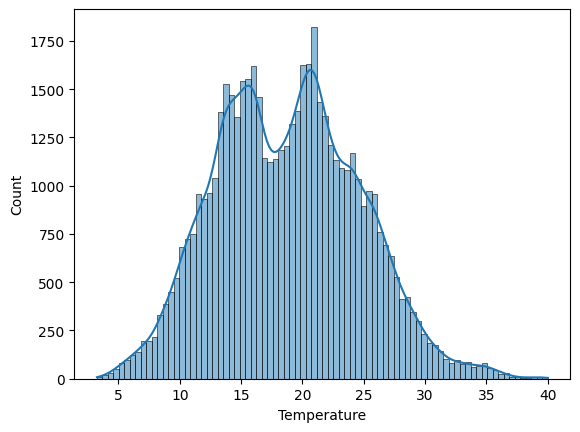

In [10]:
# Visualisation da la distribution de colonne 'Temperature'
sns.histplot(data['Temperature'], kde=True)
plt.show()

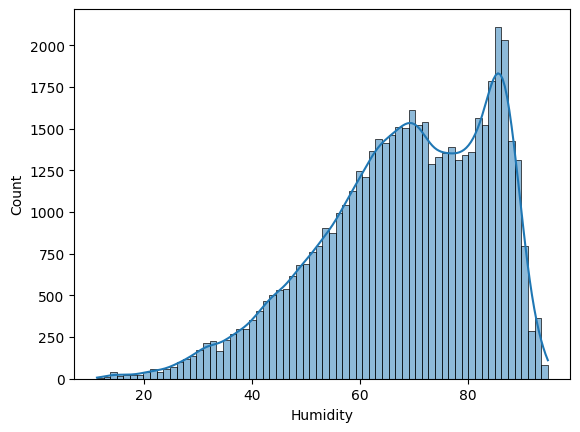

In [11]:
# Visualisation da la distribution de colonne 'Humidity'
sns.histplot(data['Humidity'], kde=True)
plt.show()

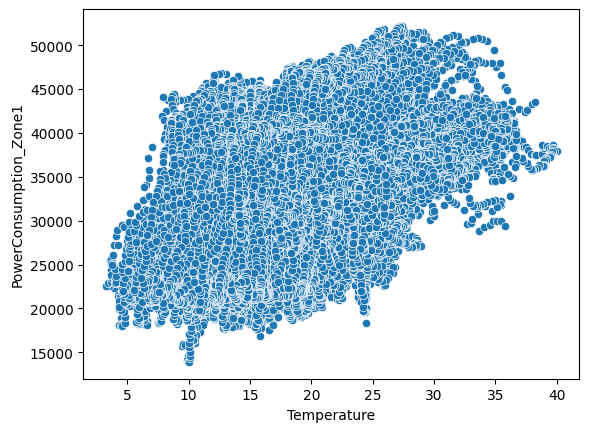

In [12]:
# Visualiser une relation entre la température et la consommation
sns.scatterplot(x=data['Temperature'], y=data['PowerConsumption_Zone1'])
plt.show()

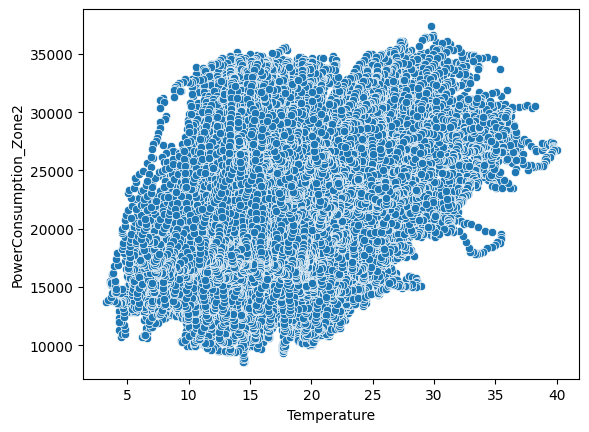

In [13]:
# Visualiser une relation entre la température et la consommation
sns.scatterplot(x=data['Temperature'], y=data['PowerConsumption_Zone2'])
plt.show()

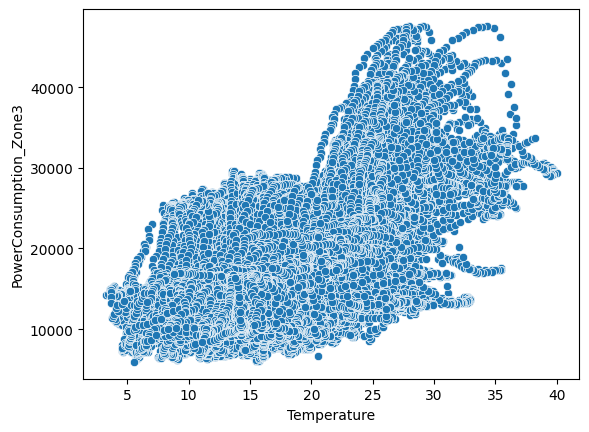

In [14]:
# Visualiser une relation entre la température et la consommation
sns.scatterplot(x=data['Temperature'], y=data['PowerConsumption_Zone3'])
plt.show()

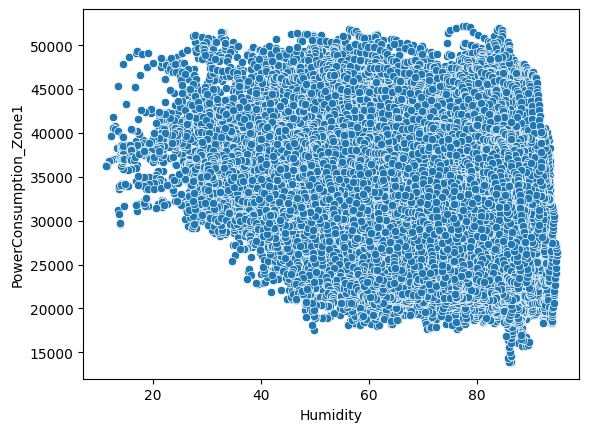

In [15]:
# Visualiser une relation entre la température et la consommation
sns.scatterplot(x=data['Humidity'], y=data['PowerConsumption_Zone1'])
plt.show()

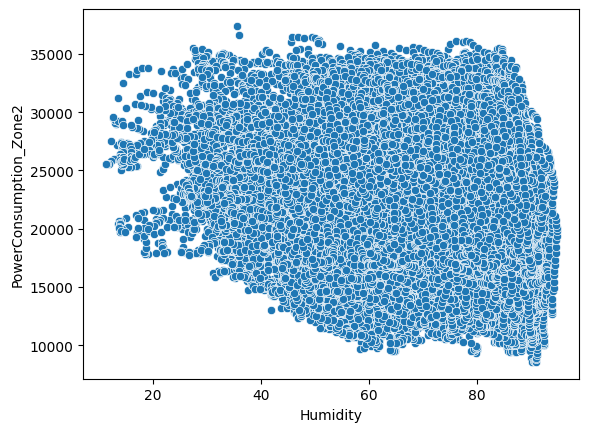

In [16]:
# Visualiser une relation entre la température et la consommation
sns.scatterplot(x=data['Humidity'], y=data['PowerConsumption_Zone2'])
plt.show()

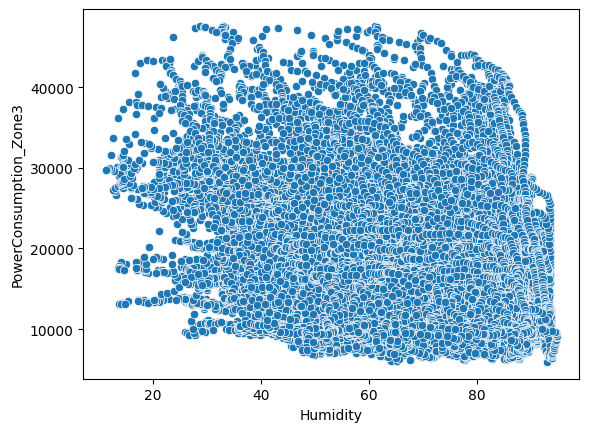

In [17]:
# Visualiser une relation entre la température et la consommation
sns.scatterplot(x=data['Humidity'], y=data['PowerConsumption_Zone3'])
plt.show()

<Axes: ylabel='Temperature'>

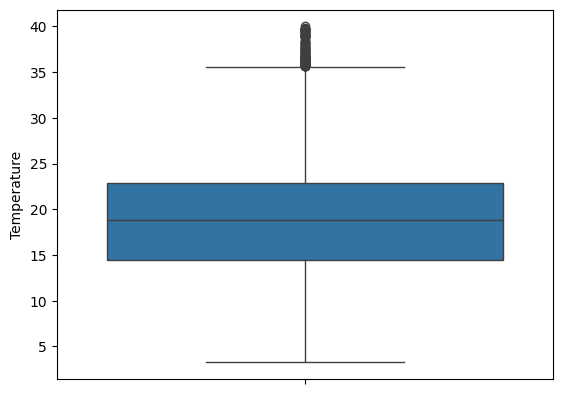

In [ ]:
# Nettoyage et Normalisation des Données pour la temperature
sns.boxplot(data['Temperature'])

<Axes: ylabel='Humidity'>

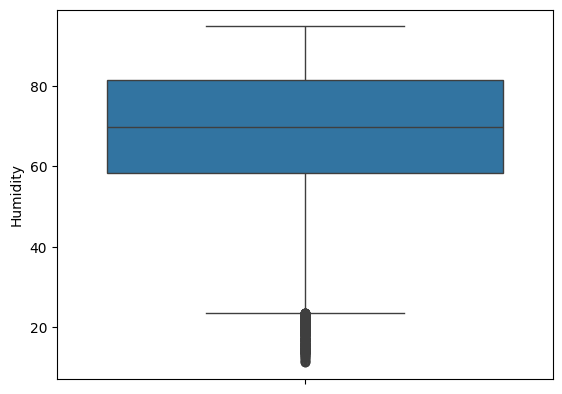

In [19]:
# Nettoyage et Normalisation des Données pour l'humidité
sns.boxplot(data['Humidity'])

<Axes: ylabel='PowerConsumption_Zone1'>

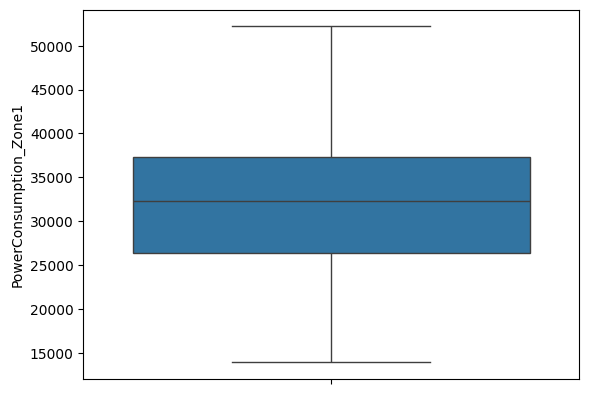

In [20]:
#Nettoyage et Normalisation des Données pour la consommation de l'energie en Zone 1
sns.boxplot(data['PowerConsumption_Zone1'])

<Axes: ylabel='PowerConsumption_Zone2'>

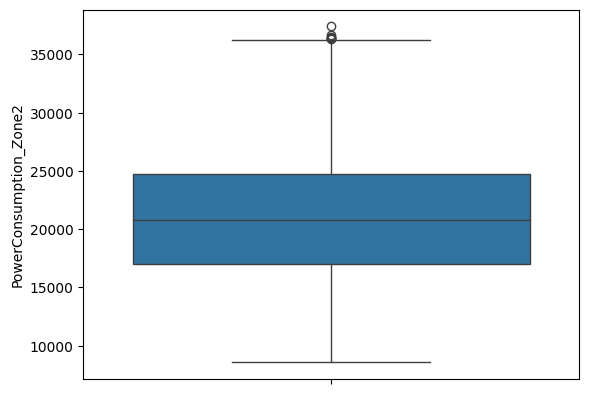

In [21]:
# Nettoyage et Normalisation des Données pour la consommation de l'energie en Zone 1
sns.boxplot(data['PowerConsumption_Zone2'])

<Axes: ylabel='PowerConsumption_Zone3'>

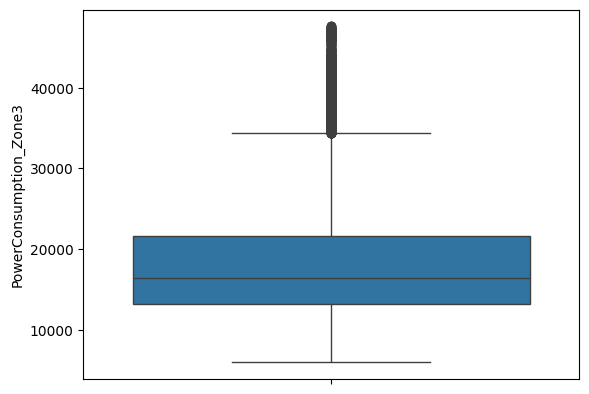

In [22]:
# Nettoyage et Normalisation des Données pour la consommation de l'energie en Zone 1
sns.boxplot(data['PowerConsumption_Zone3'])

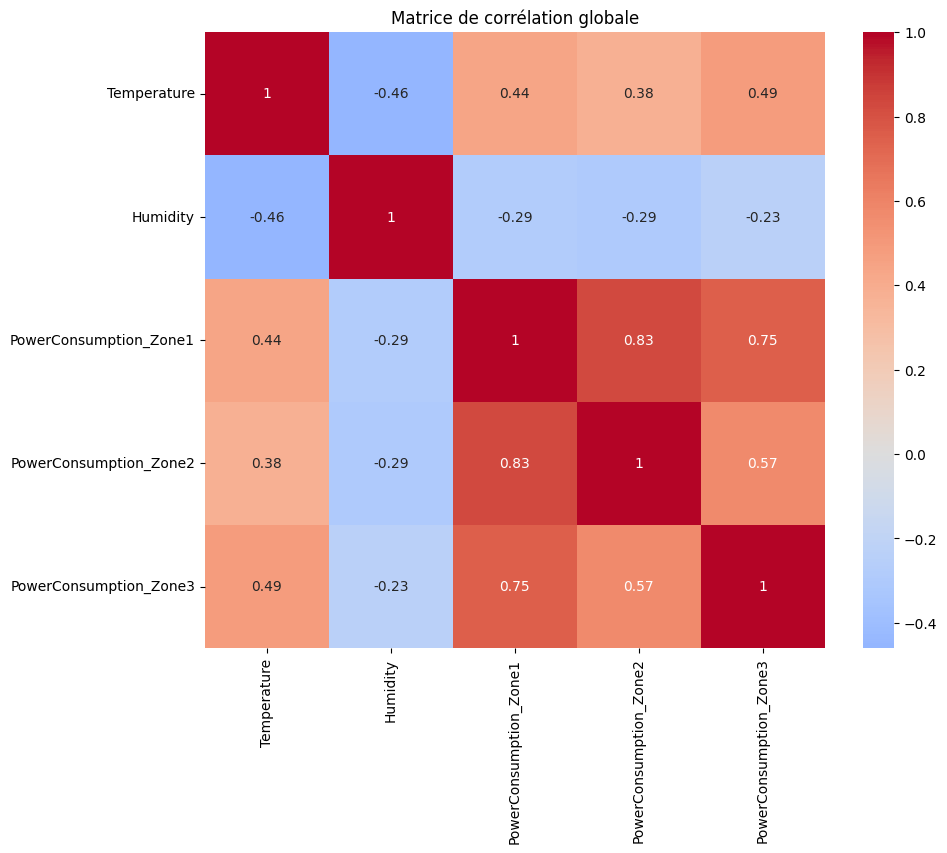

In [23]:
# Calculer la matrice de corrélation
correlation_matrix = data.corr()

# Visualiser la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Matrice de corrélation globale")
plt.show()

In [114]:

#Entraîner un modèle Regression Linear
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [118]:
LinearRegression.__name__

'LinearRegression'

In [140]:

models = {
    'LinearRegression': LinearRegression(),
    'RandomForestRegressor': RandomForestRegressor(n_estimators=100, random_state=42) ,
    'XGBRegressor': XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
}

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fonction de binarisation des cibles (exemple: seuil à 0)
def binarize_targets(y, threshold=0):
    binarizer = Binarizer(threshold=threshold)
    return binarizer.fit_transform(y)


# Appliquer la binarisation sur les cibles
y_train_bin = binarize_targets(y_train)
y_test_bin = binarize_targets(y_test)


def train_test_eval(models, X_train, y_train, X_test, y_test):
    for name, model in models.items():
        print(f"prediction de {name}")
        model = model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        if isinstance(y_test, pd.DataFrame):
            y_test = y_test.values  # Convertir en ndarray
        if isinstance(y_pred, pd.DataFrame):
            y_pred = y_pred.values  # Convertir en ndarray

        for i in range(y_test.shape[1]):
            # MAE (Mean Absolute Error)
            mae = mean_absolute_error(y_test[:, i], y_pred[:, i])
            
            # MSE (Mean Squared Error) et RMSE (Root Mean Squared Error)
            mse = mean_squared_error(y_test[:, i], y_pred[:, i])
            rmse = np.sqrt(mse)
            
            # R² (Coefficient de détermination)
            r2 = r2_score(y_test[:, i], y_pred[:, i])
            
            # Taux d'erreur (Relative Error)
            error_rate = np.mean(np.abs((y_test[:, i] - y_pred[:, i]) / y_test[:, i])) * 100  # en pourcentage
            
            # Calculer un taux d'accuracy approximatif basé sur un seuil d'erreur acceptable (par exemple, 5%)
            threshold = 0.3  # seuil d'erreur de 5%
            accuracy = np.mean(np.abs(y_test[:, i] - y_pred[:, i]) <= threshold * np.abs(y_test[:, i])) * 100  # en pourcentage

            # Affichage des résultats pour chaque cible
            print(f"Target {i + 1}:")
            print(f"  MAE = {mae}")
            print(f"  RMSE = {rmse}")
            print(f"  R² = {r2}")
            print(f"  Taux d'erreur = {error_rate}%")
            print(f"  Accuracy (approx.) = {accuracy}%\n")

            

        # Calculer les métriques globales
        overall_mae = mean_absolute_error(y_test, y_pred)
        overall_mse = mean_squared_error(y_test, y_pred)
        overall_rmse = np.sqrt(overall_mse)
        overall_r2 = r2_score(y_test, y_pred)
        overall_error_rate = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
        overall_accuracy = np.mean(np.abs(y_test - y_pred) <= 0.3 * np.abs(y_test)) * 100  # Threshold de 5%

        # Affichage des métriques globales
        print("Global metrics:")
        print(f"Overall MAE = {overall_mae}")
        print(f"Overall RMSE = {overall_rmse}")
        print(f"Overall R² = {overall_r2}")
        print(f"Overall Taux d'erreur = {overall_error_rate}%")
        print(f"Overall Accuracy (approx.) = {overall_accuracy}%")

train_test_eval(models, X_train, y_train, X_test, y_test)

prediction de LinearRegression
Target 1:
  MAE = 5177.900265537275
  RMSE = 6336.651685079497
  R² = 0.20479963345973107
  Taux d'erreur = 16.632022243247704%
  Accuracy (approx.) = 87.10415871804655%

Target 2:
  MAE = 3801.4827427466503
  RMSE = 4734.991322865217
  R² = 0.16930534591646917
  Taux d'erreur = 19.223807791140253%
  Accuracy (approx.) = 79.1396413582602%

Target 3:
  MAE = 4471.082182303139
  RMSE = 5743.56343938345
  R² = 0.24346103792930163
  Taux d'erreur = 27.611793919407447%
  Accuracy (approx.) = 62.35215566577642%

Global metrics:
Overall MAE = 4483.488396862355
Overall RMSE = 5643.929434588761
Overall R² = 0.2058553391018314
Overall Taux d'erreur = 21.155874651265137%
Overall Accuracy (approx.) = 76.19865191402772%
prediction de RandomForestRegressor
Target 1:
  MAE = 4910.818018251301
  RMSE = 6392.672037300315
  R² = 0.19067724780023598
  Taux d'erreur = 15.712923610614832%
  Accuracy (approx.) = 86.11217092712705%

Target 2:
  MAE = 3565.040171855345
  RMSE = 

In [142]:

# Créer un modèle de forêt aléatoire (RandomForestRegressor)
model = RandomForestRegressor(n_estimators=100, random_state=42) 

# Entraîner le modèle
model.fit(X_train, y_train)

# Prédire la consommation d'énergie sur les données de test
y_pred = model.predict(X_test)

# Sauvegarder le modèle entraîné et le scaler
joblib.dump(model, 'energy_model.pkl')

# Normaliser les données pour que le modèle fonctionne mieux (optionnel)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']